<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_12/02_pca_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
683,4,125,80,0,0,32.3,0.536,27,1
346,1,139,46,19,83,28.7,0.654,22,0
747,1,81,74,41,57,46.3,1.096,32,0


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#There is no null values in the dataset
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#replacing 0 values in df with the median
for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    df[i].replace({0:df[i].median()},inplace = True)

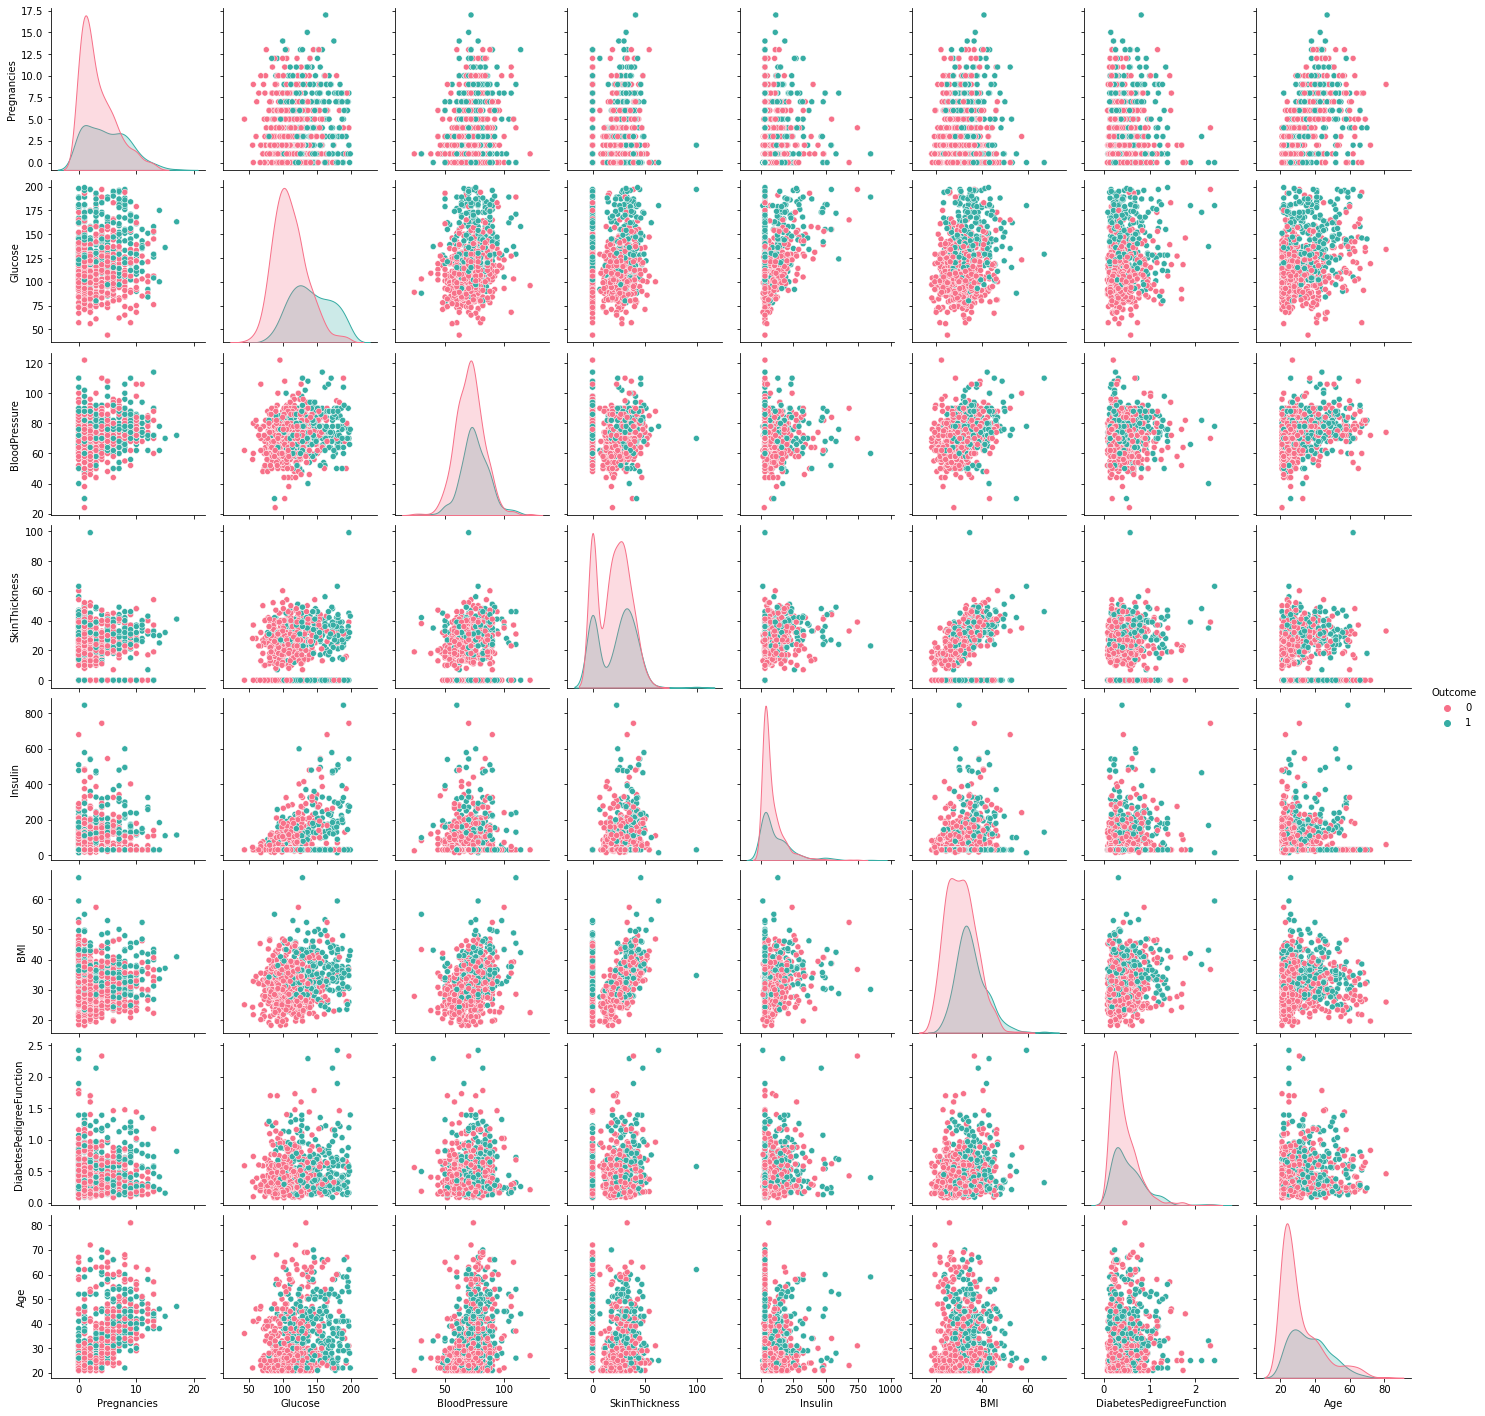

In [8]:
pair_plot = sns.pairplot(df, hue="Outcome", palette="husl")

- High Glucose level in pregnanci increase the risk of diabetes.
- BMI Above 30 and high level of Glucose togather increase the risk of diabetes.
- Increasing Glucose level is the key factor which increase the risk of diabetes.
- High Glucose level along with other variables increase the risk of diabetes.

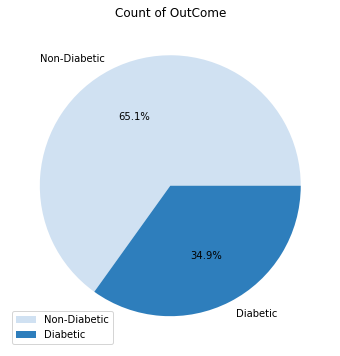

In [9]:
series = df["Outcome"].value_counts() # The labels of the bar chart
labels = ['Non-Diabetic','Diabetic']
values = series.values
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(values))) #change the color of the pie
# Plot the data
plt.figure(figsize=(10,6)) # Change the size of the figure
plt.pie(values, labels = labels, autopct = '%1.1f%%', colors=colors) 
plt.title("Count of OutCome") 
plt.legend(labels,loc=3)

plt.show() # show results 

The pie chart show the percentage of non-diabetic is 65%, which is higher than the percentage of diabetic patients 35%

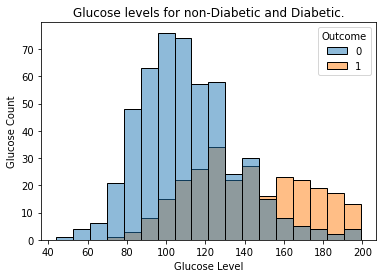

In [10]:
sns.histplot(data = df , x = df.Glucose , hue = df.Outcome)
plt.xlabel('Glucose Level')
plt.ylabel('Glucose Count')
plt.title('Glucose levels for non-Diabetic and Diabetic.');

We can see the non diabetic patients has a Glucose levels between 50 to 150, while the diabetic patients has a higher range between 80 and 200.

In [11]:
# Simple Baseline 
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

### Split the data

### RandomForestClassifier as baseline

In [12]:
# Train test split
X1 = df.drop(columns = 'Outcome')
y1 = df['Outcome']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size=0.2, random_state=1)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X1_train, y1_train)

# Predicting the Test set results
y1_pred = classifier.predict(X1_test)

In [15]:
cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[93  6]
 [32 23]]


In [16]:
print("Random Forest Classifier Model:")
print(f'Accuracy:{round(metrics.accuracy_score(y1_test, y1_pred),2)*100}%')
print(f'Recall:{round(metrics.recall_score(y1_test, y1_pred),2)*100}%')
print(f'Precision:{round(metrics.precision_score(y1_test, y1_pred),2)*100}%')

Random Forest Classifier Model:
Accuracy:75.0%
Recall:42.0%
Precision:79.0%


### Logistic Regression with scaling 

In [17]:
# Train test split
X = df.drop(columns = 'Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [18]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_sc, y_train)
y_pred = log_reg.predict(X_test_sc)


print("Cost Function results for Logistic Regression with standard scaling:")
print(f'Accuracy:{round(metrics.accuracy_score(y_test, y_pred),2)*100}%')
print(f'Recall:{round(metrics.recall_score(y_test, y_pred),2)*100}%')
print(f'Precision:{round(metrics.precision_score(y_test, y_pred),2)*100}%')

Cost Function results for Logistic Regression with standard scaling:
Accuracy:77.0%
Recall:57.99999999999999%
Precision:73.0%


### Logistic Regression with PCA:

In [19]:
# fit PCA
pca = PCA(n_components = 0.85) #n_components = 6
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

logreg_PCA = LogisticRegression()

logreg_PCA.fit(X_train_pca, y_train)

y_pred_PCA = logreg_PCA.predict(X_test_pca)

print("Cost Function result for Logistic Regression with PCA")
print(f'Accuracy:{round(metrics.accuracy_score(y_test, y_pred_PCA),2)*100}%')
print(f'Recall:{round(metrics.recall_score(y_test, y_pred_PCA),2)*100}%')
print(f'Precision:{round(metrics.precision_score(y_test, y_pred_PCA),2)*100}%')


Cost Function result for Logistic Regression with PCA
Accuracy:77.0%
Recall:56.00000000000001%
Precision:72.0%


### Comparing results

In [22]:
# Baseline 
print("Simple Baseline:")
print(df["Outcome"].value_counts(normalize=True))
print('\n')
print("Random Forest Classifier Model:")
print(f'Accuracy:{round(metrics.accuracy_score(y1_test, y1_pred),2)*100}%')
print(f'Recall:{round(metrics.recall_score(y1_test, y1_pred),2)*100}%')
print(f'Precision:{round(metrics.precision_score(y1_test, y1_pred),2)*100}%')
print('\n')
print("Logistic Regression with standard scaling:")
print(f'Accuracy:{round(metrics.accuracy_score(y_test, y_pred),2)*100}%')
print(f'Recall:{round(metrics.recall_score(y_test, y_pred),2)*100}%')
print(f'Precision:{round(metrics.precision_score(y_test, y_pred),2)*100}%')
print('\n')
print("Logistic Regression with PCA")
print(f'Accuracy:{round(metrics.accuracy_score(y_test, y_pred_PCA),2)*100}%')
print(f'Recall:{round(metrics.recall_score(y_test, y_pred_PCA),2)*100}%')
print(f'Precision:{round(metrics.precision_score(y_test, y_pred_PCA),2)*100}%')
print('\n')
print('Variance ratios for each principal component')
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


Simple Baseline:
0    0.651042
1    0.348958
Name: Outcome, dtype: float64


Random Forest Classifier Model:
Accuracy:75.0%
Recall:42.0%
Precision:79.0%


Logistic Regression with standard scaling:
Accuracy:77.0%
Recall:57.99999999999999%
Precision:73.0%


Logistic Regression with PCA
Accuracy:77.0%
Recall:56.00000000000001%
Precision:72.0%


Variance ratios for each principal component
[0.25589489 0.2284885  0.12865906 0.10676572 0.10105075 0.07170942]


The Logistic regression model outcomes the simple baseline.
the logistic regression with standard scaling model gave us higher accuracye than the random forest classifier. 
However, with scaling only model and scaling with pca, the two models gave us an equal accuracy, recall and precision. 

After applying pca with stranderd scaled logistic regression model we achieved optimal level of accuracy , while  reducing the number of features in the dataset. It can be seen from the Variance ratios that first principal component is responsible for 25.58% variance. Similarly, the second principal component causes 22.84% variance in the dataset. Collectively we can say that the sum of component ratio 77% of the classification information contained in the feature set is captured by the first 6 principal components.